# Define Qiskit circuit

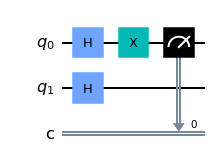

In [1]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2, 1)
qc.h(0)
qc.h(1)
qc.x(0)
qc.measure([0], [0])
qc.draw('mpl')

# Transpile

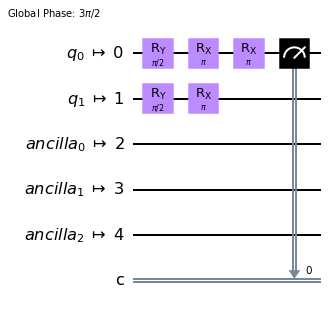

In [2]:
from qiskit.test.mock import FakeVigo
from qiskit import transpile
backend = FakeVigo()
backend.configuration().basis_gates = ['id', 'rx','ry']
transp_qc = transpile(qc, backend=backend, optimization_level=0)
transp_qc.draw('mpl')

# Convert to Qutip
sort of unnecessary but we are doing it like this for now

In [3]:
from qutip.qip.qasm import read_qasm
qasm_str = transp_qc.qasm()
#TBD: optmize openQASM with TriQ algorithms
qutip_qc = read_qasm(qasm_str, strmode=True)

# Pulse Simulation Code

In [4]:
from HaPiCodes.simulation import basicSimulatePulse as bsp
from HaPiCodes.test_examples import msmtInfoSel
from HaPiCodes.data_process import fittingAndDataProcess as f
import yaml
yamlFile = msmtInfoSel.cwYaml
msmtInfoDict = yaml.safe_load(open(yamlFile, 'r'))
f.yamlFile = yamlFile

In [5]:
WQ = bsp.BasicExperiments(msmtInfoDict)
W, Q = WQ.generateFromCircuit(qutip_qc)
WQ.generateDrivePulse()
res = WQ.simulate()

100.0%. Run time:   1.09s. Est. time left: 00:00:00:00
Total run time:   1.10s


/home/evm9/Documents/HaPiCodes/HaPiCodes/pulse/waveformAndQueue.py:509: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  indexSlider = Slider(ax=axPos, label='Index', valmin=0.0, valmax=self.numOfIndex-1, valstep=1)


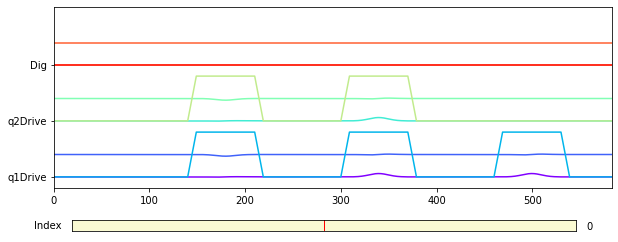

In [6]:
WQ.plot(1)